In [376]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [377]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30

In [378]:
HTS = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv", encoding = "cp949")
players = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv", encoding ="cp949")
batter_base = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv", encoding = "cp949")
team = pd.read_csv("01_제공데이터/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = "cp949")
score = pd.read_csv("01_제공데이터/18년득점타점.csv", encoding = "utf-8")

In [379]:
predict_name_list = ["양의지", "강백호", "최정", "이정후", "채은성", "김재환", "전준우", "김현수", "박건우", "로맥"]

In [380]:
print(HTS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35029 entries, 0 to 35028
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GYEAR        35029 non-null  int64  
 1   G_ID         35029 non-null  object 
 2   PIT_ID       35029 non-null  object 
 3   PCODE        35029 non-null  int64  
 4   T_ID         35029 non-null  object 
 5   INN          35029 non-null  int64  
 6   HIT_VEL      35029 non-null  float64
 7   HIT_ANG_VER  35029 non-null  float64
 8   HIT_RESULT   35029 non-null  object 
 9   PIT_VEL      35029 non-null  float64
 10  STADIUM      35029 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 2.9+ MB
None


In [381]:
len(HTS["PIT_ID"].unique())

34805

In [382]:
HTS.describe()

,GYEAR,PCODE,INN,HIT_VEL,HIT_ANG_VER,PIT_VEL
count,35029.0,35029.000000,35029.000000,35029.000000,35029.00000,35029.000000
mean,2018.0,70903.056867,4.916840,132.036774,16.07819,135.710365
std,0.0,6877.379151,2.583441,24.823247,24.85806,9.445294
min,2018.0,60100.000000,1.000000,9.880000,-68.90000,88.290000
25%,2018.0,64153.000000,3.000000,118.470000,-2.80000,129.670000
50%,2018.0,71752.000000,5.000000,137.380000,13.60000,137.290000
75%,2018.0,76720.000000,7.000000,150.340000,31.40000,143.220000
max,2018.0,99810.000000,12.000000,210.130000,89.60000,159.400000


In [383]:
print(players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GYEAR     652 non-null    int64 
 1   PCODE     652 non-null    int64 
 2   NAME      652 non-null    object
 3   T_ID      652 non-null    object
 4   POSITION  652 non-null    object
 5   AGE_VA    652 non-null    int64 
 6   MONEY     652 non-null    object
dtypes: int64(3), object(4)
memory usage: 35.8+ KB
None


In [384]:
print(batter_base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GYEAR    275 non-null    int64  
 1   PCODE    275 non-null    int64  
 2   GAMENUM  275 non-null    int64  
 3   PA       275 non-null    int64  
 4   AB       275 non-null    int64  
 5   BA       275 non-null    float64
 6   HIT      275 non-null    int64  
 7   HR       275 non-null    int64  
 8   TOTB     275 non-null    int64  
 9   SLG      275 non-null    float64
 10  SF       275 non-null    int64  
 11  BB       275 non-null    int64  
 12  KK       275 non-null    int64  
 13  IB       275 non-null    int64  
 14  HP       275 non-null    int64  
 15  GD       275 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 34.5 KB
None


In [385]:
print(len(list(players["PCODE"])))
print(len(list(HTS["PCODE"])))
print(len(list(batter_base["PCODE"])))
print("\n")

print(len(set(list(players["PCODE"]))))
print(len(set(list(HTS["PCODE"]))))
print(len(set(list(batter_base["PCODE"]))))
print("\n")


print(len(set(list(HTS["PCODE"])).intersection(set(list(players["PCODE"])))))
print(len(set(list(HTS["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print(len(set(list(players["PCODE"])).intersection(set(list(batter_base["PCODE"])))))
print("\n")

652
35029
275


652
266
275


266
266
275




In [386]:
PCODE = list(players["PCODE"])
NAME = list(players["NAME"])
AGE = list(players["AGE_VA"])


len(list(zip(PCODE, NAME)))

652

In [387]:
players_name_number = dict(list(zip(PCODE, NAME)))
players_age_number = dict(list(zip(PCODE, AGE)))

In [388]:
HTS["NAME"] = HTS["PCODE"].map(players_name_number)
batter_base["NAME"] = batter_base["PCODE"].map(players_name_number)


HTS["AGE_VA"] = HTS["PCODE"].map(players_age_number)
batter_base["AGE_VA"] = batter_base["PCODE"].map(players_age_number)

In [389]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,HH,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,HH,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,HH,1,152.41,2.1,1루타,148.59,고척,김태균,36


In [390]:
players.head(3)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,HH,외,30,5000만원
1,2018,60105,배민관,LG,투,26,3200만원
2,2018,60140,신정락,LG,투,31,10500만원


In [391]:
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,30
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,27
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,26


In [392]:
team_dict = {
    "HH" : "한화",
    "HT" : "KIA",
    "KT" : "KT",
    "LG" : "LG",
    "LT" : "롯데",
    "NC" : "NC",
    "OB" : "두산",
    "SK" : "SSG",
    "SS" : "삼성",
    "WO" : "키움"
}

In [393]:
team_dict

{'HH': '한화',
 'HT': 'KIA',
 'KT': 'KT',
 'LG': 'LG',
 'LT': '롯데',
 'NC': 'NC',
 'OB': '두산',
 'SK': 'SSG',
 'SS': '삼성',
 'WO': '키움'}

In [394]:
HTS["T_ID"] = HTS["T_ID"].map(team_dict)
players["T_ID"] = players["T_ID"].map(team_dict)

In [171]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36


C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


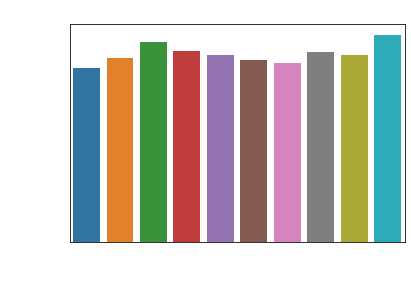

In [172]:
sns.countplot(HTS.T_ID)
plt.xticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.yticks(color="w", fontsize =15) #xticks 색상과 폰트 크기 조정
plt.xlabel("팀이름", color = "w", fontsize = 15)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("팀별경기수", color = "w", fontsize = 15)

plt.show()

In [173]:
HTS.HIT_VEL.describe()

count    35029.000000
mean       132.036774
std         24.823247
min          9.880000
25%        118.470000
50%        137.380000
75%        150.340000
max        210.130000
Name: HIT_VEL, dtype: float64

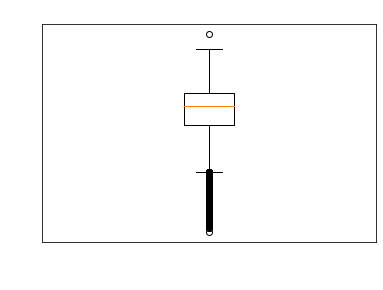

In [174]:
plt.boxplot(HTS.HIT_VEL)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("타구속도", color = "w", fontsize = 15)
plt.show()

In [124]:
HTS.HIT_VEL.describe()

count    35029.000000
mean       132.036774
std         24.823247
min          9.880000
25%        118.470000
50%        137.380000
75%        150.340000
max        210.130000
Name: HIT_VEL, dtype: float64

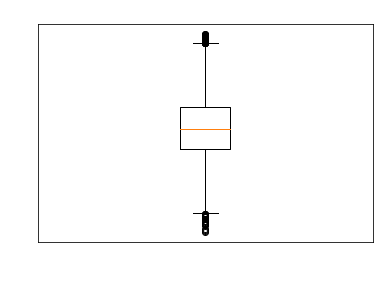

In [125]:
plt.boxplot(HTS.HIT_ANG_VER)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("발사각도", color = "w", fontsize = 15)
plt.show()

In [126]:
HTS.HIT_ANG_VER.describe()

count    35029.00000
mean        16.07819
std         24.85806
min        -68.90000
25%         -2.80000
50%         13.60000
75%         31.40000
max         89.60000
Name: HIT_ANG_VER, dtype: float64

In [127]:
HTS.HIT_ANG_VER.describe()

count    35029.00000
mean        16.07819
std         24.85806
min        -68.90000
25%         -2.80000
50%         13.60000
75%         31.40000
max         89.60000
Name: HIT_ANG_VER, dtype: float64

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


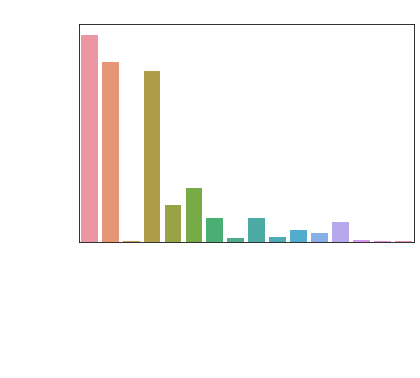

In [128]:
sns.countplot(HTS.HIT_RESULT)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("타격결과", color = "w", fontsize = 15)
plt.show()

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


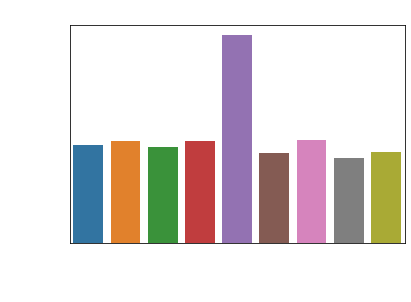

In [129]:
sns.countplot(HTS.STADIUM)
plt.xticks(rotation = 90, color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", color = "w", fontsize = 13)
plt.ylabel("count", color = "w", fontsize = 15)
plt.title("구장별경기수", color = "w", fontsize = 15)
plt.show()

Text(0.5, 1.0, '타구속도 별 발사각도')

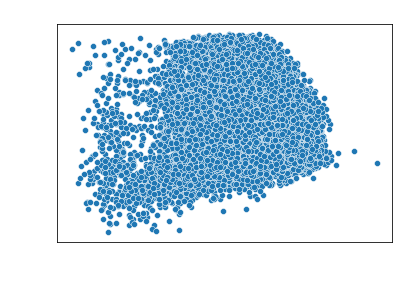

In [130]:
sns.scatterplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 발사각도')

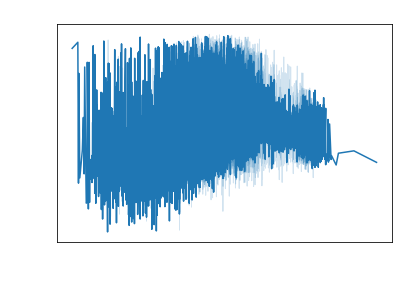

In [131]:
sns.lineplot( x = "HIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타구속도 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

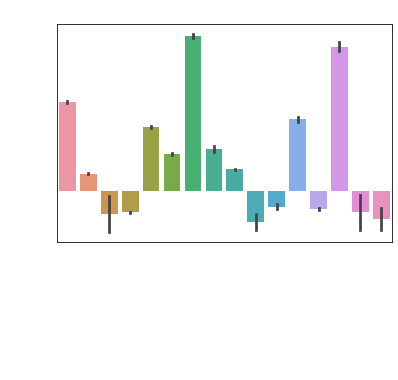

In [132]:
sns.barplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타격결과 별 발사각도')

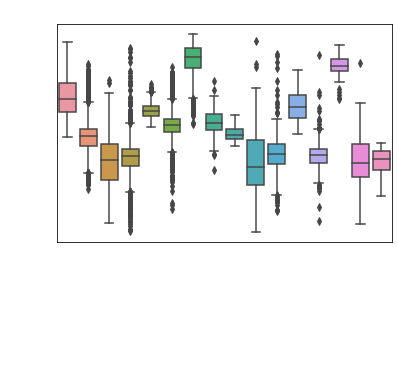

In [133]:
sns.boxplot( x = "HIT_RESULT", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("타격결과 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

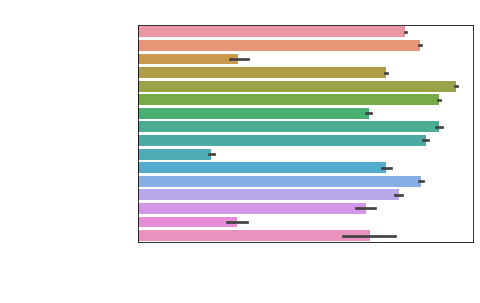

In [134]:
sns.barplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '타구속도 별 타격결과')

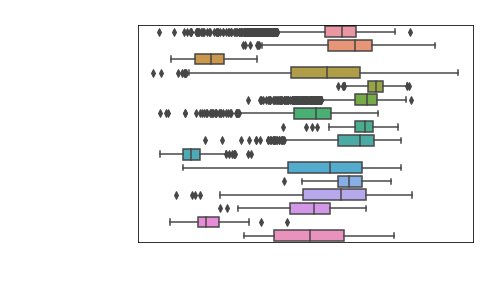

In [135]:
sns.boxplot( x = "HIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("타구속도 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

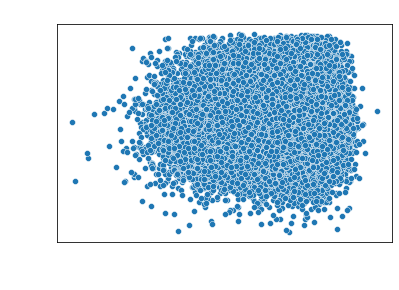

In [136]:
sns.scatterplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 발사각도')

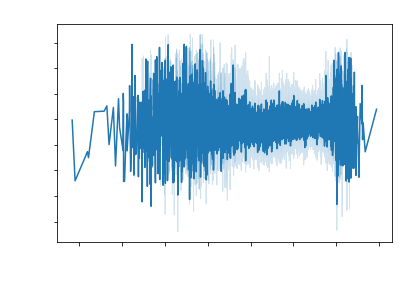

In [109]:
sns.lineplot( x = "PIT_VEL", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("상대투수구속 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

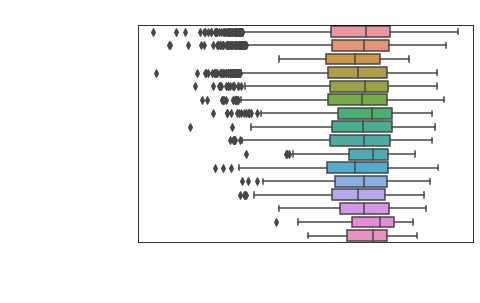

In [137]:
sns.boxplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '상대투수구속 별 타격결과')

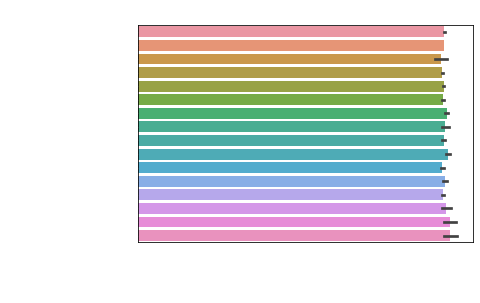

In [138]:
sns.barplot( x = "PIT_VEL", y = "HIT_RESULT", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("PIT_VEL", fontsize = 15, color = "w")
plt.ylabel("HIT_RESULT", fontsize = 15, color = "w")
plt.title("상대투수구속 별 타격결과", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 타구속도')

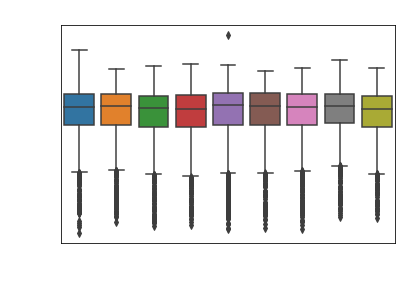

In [139]:
sns.boxplot( x = "STADIUM", y = "HIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 타구속도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 발사각도')

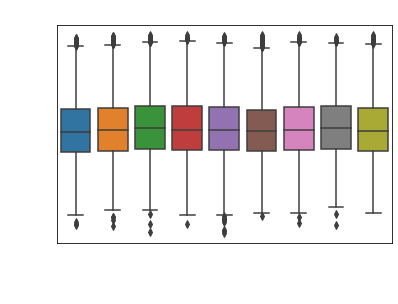

In [140]:
sns.boxplot( x = "STADIUM", y = "HIT_ANG_VER", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("HIT_ANG_VER", fontsize = 15, color = "w")
plt.title("구장 별 발사각도", color = "w", fontsize = 15)


Text(0.5, 1.0, '구장 별 상대투수투구구속')

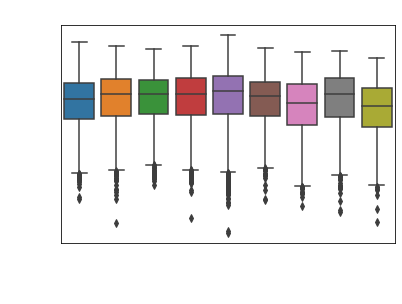

In [141]:
sns.boxplot( x = "STADIUM", y = "PIT_VEL", data = HTS)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("STADIUM", fontsize = 15, color = "w")
plt.ylabel("PIT_VEL", fontsize = 15, color = "w")
plt.title("구장 별 상대투수투구구속", color = "w", fontsize = 15)


In [142]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_ANG_VER")

In [143]:
pivot

HIT_RESULT,1루타,2루타,3루타,내야안타(1루타),땅볼아웃,번트아웃,번트안타,병살타,야수선택,인필드플라이,직선타,파울플라이,플라이,홈런,희생번트,희생플라이
STADIUM,,,,,,,,,,,,,,,,
고척,6.530218,16.074386,18.550000,-8.728358,-9.618396,-6.200000,6.640000,-8.893333,0.500000,67.550000,9.849180,67.368269,39.501592,28.781290,-12.063636,31.465854
광주,7.459529,16.130645,16.517391,-4.792593,-9.094737,-14.833333,-10.533333,-8.762105,-18.100000,71.433333,9.603810,70.628226,38.998846,28.729114,-14.717241,33.786667
대구,7.332919,16.331349,15.663158,-4.411905,-9.350270,-10.033333,-24.500000,-6.609211,-10.133333,66.577778,10.618400,66.662185,40.663297,29.046286,-17.705263,30.410000
대전,8.010784,17.276887,20.046667,-4.757692,-7.398206,-24.080000,-6.744444,-8.175362,-8.650000,62.860000,10.195604,66.484615,40.153612,28.832353,3.070000,31.652778
마산,8.843199,16.915226,18.433333,-1.208108,-7.914815,2.355556,-12.462500,-5.186458,-10.350000,64.007143,10.074038,68.772897,39.370821,28.215135,-14.315789,31.295918
문학,7.879932,14.743128,19.425000,-7.174138,-9.616175,-20.080000,-46.200000,-7.753684,-12.000000,60.790000,9.307438,68.284615,41.026537,28.098305,-14.695833,32.832258
사직,7.212245,17.232700,22.868182,-5.882812,-8.794765,-25.100000,4.466667,-7.486316,-20.200000,59.000000,9.639823,72.180851,39.206667,28.522599,-17.255000,31.267442
수원,7.998806,17.832624,19.309091,-5.891379,-9.451687,-4.200000,-36.500000,-9.266055,-2.400000,60.171429,9.796875,73.392771,40.962231,29.156771,-7.569565,30.805882
잠실,8.391183,15.978203,18.660526,-9.928966,-10.284507,-4.100000,-14.300000,-8.178000,-19.766667,65.414286,9.671362,68.830364,39.163569,28.313846,-16.126087,33.312621


Text(0.5, 1.0, '구장 별 타격결과 발사각도')

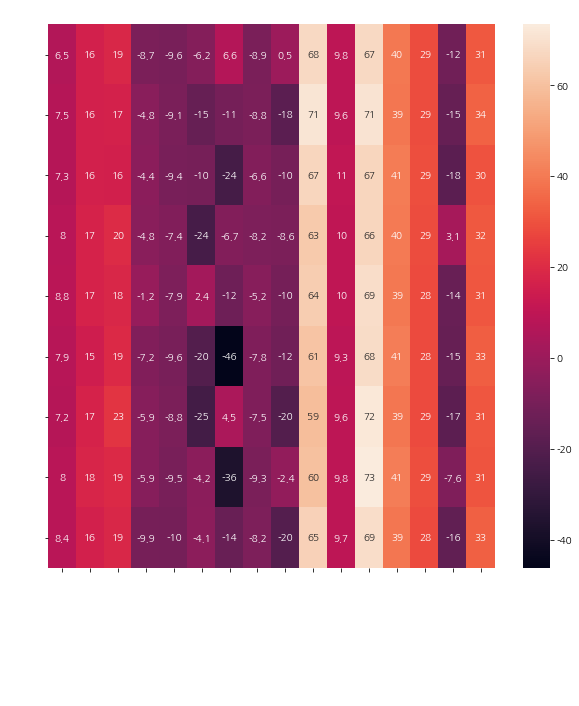

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 발사각도", color = "w", fontsize = 15)

In [144]:
pivot = HTS.pivot_table(index = "STADIUM", columns = "HIT_RESULT",values = "HIT_VEL")

Text(0.5, 1.0, '구장 별 타격결과 타구속도')

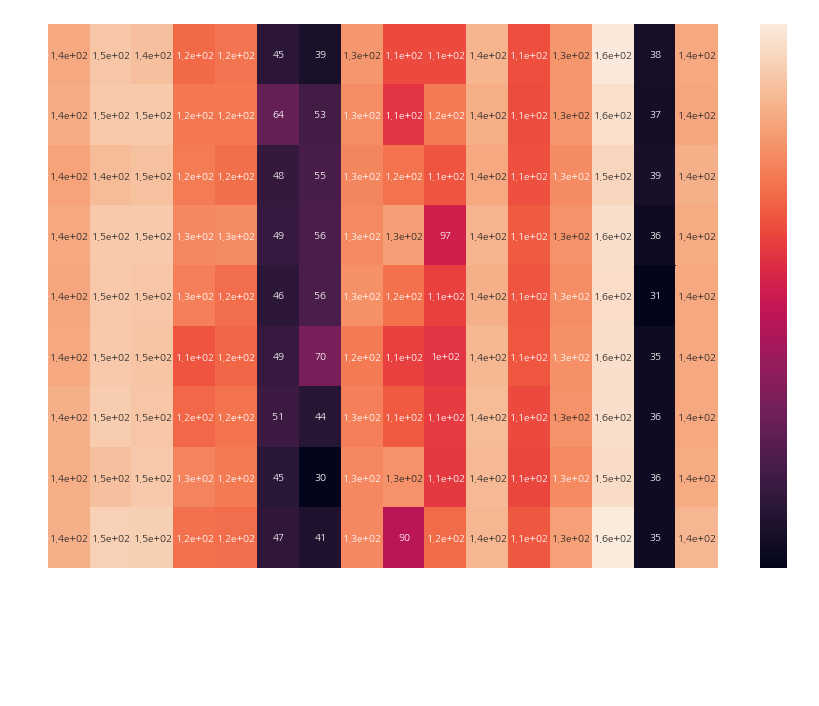

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(data = pivot, annot = True)
plt.xticks(color = "w", fontsize = 15,rotation = 90)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("HIT_RESULT", fontsize = 15, color = "w")
plt.ylabel("STADIUM", fontsize = 15, color = "w")
plt.title("구장 별 타격결과 타구속도", color = "w", fontsize = 15)

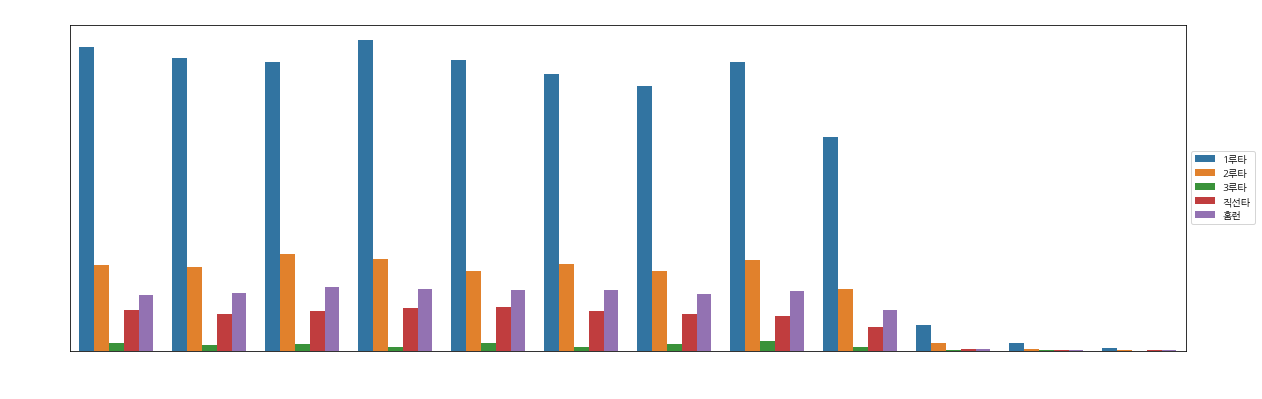

In [182]:
a = pd.DataFrame(HTS.groupby(["INN","HIT_RESULT"])["HIT_RESULT"].count())
a = a.rename(columns = {"HIT_RESULT" : "count"}).reset_index()
b = a[(a["HIT_RESULT"] == "1루타") | (a["HIT_RESULT"] == "2루타") | (a["HIT_RESULT"] == "3루타") | (a["HIT_RESULT"] == "홈런") | (a["HIT_RESULT"] == "직선타")]

plt.figure(figsize = (20,6))
sns.barplot(x = "INN", y = "count", data = b, hue = "HIT_RESULT")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("INN", fontsize = 15, color = "w")
plt.ylabel("COUNT", fontsize = 15, color = "w")
plt.title("18년 이닝별결과", color = "w", fontsize = 15)
plt.legend(loc = "center left", bbox_to_anchor = (1,0.5))


In [147]:
b.groupby(["HIT_RESULT"])["count"].sum()

HIT_RESULT
1루타    8408
2루타    2519
3루타     180
직선타    1122
홈런     1708
Name: count, dtype: int64

In [148]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36


In [395]:
HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()
HIT_VEL_ANG_mean.loc[["홈런","1루타","2루타","3루타","직선타"]]

<ipython-input-395-2157134e4bc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HIT_VEL_ANG_mean = HTS.groupby(["HIT_RESULT"])["HIT_VEL", "HIT_ANG_VER"].mean()


,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
홈런,156.084543,28.597248
1루타,138.436637,7.812488
2루타,147.745562,16.474236
3루타,147.744889,18.806667
직선타,141.152086,9.841622


In [396]:
HIT_VEL_ANG_mean.loc[:]

,HIT_VEL,HIT_ANG_VER
HIT_RESULT,,
1루타,138.436637,7.812488
2루타,147.745562,16.474236
3루타,147.744889,18.806667
내야안타(1루타),121.780156,-6.750433
땅볼아웃,121.769620,-9.238711
번트아웃,48.416316,-9.289474
번트안타,49.253571,-10.019048
병살타,127.908908,-7.881622
야수선택,113.578000,-12.125000


In [397]:
HTS.head(3)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36


In [398]:
players.head(3)

,GYEAR,PCODE,NAME,T_ID,POSITION,AGE_VA,MONEY
0,2018,60100,백창수,한화,외,30,5000만원
1,2018,60105,배민관,LG,투,26,3200만원
2,2018,60140,신정락,LG,투,31,10500만원


In [399]:
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,30
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,27
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,26


In [400]:
# 출루율 공식 (안타+사사구)÷(타수+사사구+희생플라이)

# batter_base 새로운 컬럼 추가(출루율)

batter_base["OBP"] = (batter_base["HIT"] + batter_base["BB"] + batter_base["HP"]) / (batter_base["AB"] + batter_base["BB"] + batter_base["HP"] + batter_base["SF"])
batter_base["OPS"] = batter_base["OBP"] + batter_base["SLG"]
batter_base.head(3)

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,30,0.313609,0.727609
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,27,0.200000,0.500000
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,26,0.000000,0.000000


Text(0.5, 1.0, '18년 타수별 OPS')

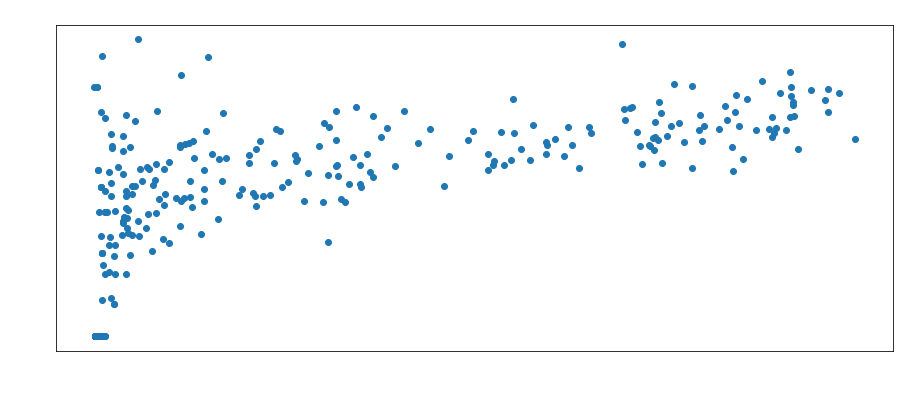

In [401]:
plt.figure(figsize=(15,6))
plt.plot("AB", "OPS", data = batter_base, marker = "o", linestyle = "none")
plt.xticks(color = "w", fontsize = 15)
plt.yticks(color = "w", fontsize = 15)
plt.xlabel("AB", fontsize = 15, color = "w")
plt.ylabel("OPS", fontsize = 15, color = "w")
plt.title("18년 타수별 OPS", color = "w", fontsize = 15)

In [402]:
# OPS 이상치 탐색을 위한 수치 정의

Q1 = batter_base["OPS"].quantile(0.25)
Q3 = batter_base["OPS"].quantile(0.75)
IQR = Q3 - Q1
# 실제 OPS 이상치 탐색

batter_base.loc[(batter_base["OPS"] < (Q1 - 1.5 * IQR)) | (batter_base["OPS"] > (Q3 + 1.5 * IQR))].sort_values(by = ["AB"], axis = 0, ascending = False)


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
19,2018,61366,6,8,8,0.0,0,0,0,0.0,0,0,3,0,0,1,홍성갑,25,0.0,0.0
106,2018,65412,6,8,8,0.0,0,0,0,0.0,0,0,0,0,0,0,권정웅,25,0.0,0.0
267,2018,79453,5,7,7,0.0,0,0,0,0.0,0,0,1,0,0,0,오정복,31,0.0,0.0
66,2018,63440,7,7,7,0.0,0,0,0,0.0,0,0,1,0,0,0,이흥련,29,0.0,0.0
127,2018,66715,4,6,6,0.0,0,0,0,0.0,0,0,2,0,0,0,김인환,24,0.0,0.0
67,2018,63448,4,4,4,0.0,0,0,0,0.0,0,0,1,0,0,0,김영환,25,0.0,0.0
264,2018,79364,6,4,4,0.0,0,0,0,0.0,0,0,1,0,0,0,김종민,32,0.0,0.0
108,2018,65618,3,3,3,0.0,0,0,0,0.0,0,0,2,0,0,0,황인준,26,0.0,0.0
65,2018,63360,8,2,2,0.0,0,0,0,0.0,0,0,0,0,0,0,장시윤,24,0.0,0.0
146,2018,67610,1,2,2,0.0,0,0,0,0.0,0,0,1,0,0,0,김석환,19,0.0,0.0


In [403]:
HTS.head(30)

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36
3,2018,20180324HHWO0,180324_140911,62700,한화,1,113.72,13.5,1루타,139.13,고척,하주석,24
4,2018,20180324HHWO0,180324_142050,68730,한화,2,54.11,16.4,번트안타,134.07,고척,호잉,29
5,2018,20180324HHWO0,180324_142310,78288,한화,2,161.90,3.5,1루타,145.75,고척,최재훈,28
6,2018,20180324HHWO0,180324_142817,78756,한화,2,105.03,0.9,땅볼아웃,146.00,고척,오선진,29
7,2018,20180324HHWO0,180324_143122,74163,한화,2,115.52,26.6,플라이,122.82,고척,이용규,32
8,2018,20180324HHWO0,180324_143925,64300,키움,2,154.95,0.8,1루타,140.14,고척,김하성,22
9,2018,20180324HHWO0,180324_145047,79365,키움,2,127.35,61.1,플라이,149.84,고척,박동원,28


# 배럴 타구 정의

In [404]:
# # 타구속도 147마일 이상, 16 <= 발사각도 <= 30 


# Barrel_HTS_first = HTS.copy()
# Barrel_HTS_first = Barrel_HTS_first[(Barrel_HTS_first["HIT_VEL"] >= 147) & (Barrel_HTS_first["HIT_ANG_VER"] >= 16) & (Barrel_HTS_first["HIT_ANG_VER"] <= 30)].reset_index(drop = True)

# # 장타율 계산

# # 분모 : 티수 => 행 길이
# print("장타율계산")

# print("분모 : {}".format(len(Barrel_HTS_first)))
# denominator = len(Barrel_HTS_first)

# # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4

# numerator = (Barrel_HTS_first["HIT_RESULT"].value_counts()["1루타"] * 1) + (Barrel_HTS_first["HIT_RESULT"].value_counts()["2루타"] * 2) + \
#             (Barrel_HTS_first["HIT_RESULT"].value_counts()["3루타"] * 3) + (Barrel_HTS_first["HIT_RESULT"].value_counts()["홈런"] * 4)

# print("분자 : {}".format(numerator))

# # 장타율
# OBP = numerator / denominator
# print("장타율 : " , OBP)

# #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# print("-" * 50)
# # 타율 계산


# # 분모 : 티수 => 행 길이
# print("타율계산")

# print("분모 : {}".format(len(Barrel_HTS_first)))
# denominator = len(Barrel_HTS_first)

# # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
# numerator = (Barrel_HTS_first["HIT_RESULT"].value_counts()["1루타"] + Barrel_HTS_first["HIT_RESULT"].value_counts()["2루타"] + \
#             Barrel_HTS_first["HIT_RESULT"].value_counts()["3루타"] + Barrel_HTS_first["HIT_RESULT"].value_counts()["홈런"])

# print("분자 : {}".format(numerator))

# # 타율

# avg = numerator / denominator
# print("타율" , avg)

In [405]:
# # Barrel_Hit 함수 정의

# # 타구속도 160이하만


# # Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2, 투수구속1, 투수구속2)

# def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2, PIT_VEL1, PIT_VEL2):
#     df_copy = df.copy()
#     df_copy = df_copy[
#                                     (df_copy["HIT_VEL"] >= HIT_VEL) & \
#                                     (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) & \
#                                     (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2) & \
#                                     (df_copy["PIT_VEL"] >= PIT_VEL1) & \
#                                     (df_copy["PIT_VEL"] <= PIT_VEL2)].reset_index(drop = True)
#     # 장타율 계산

#     # 분모 : 타수 => 행 길이
#     #print("장타율계산")

#     #print("분모 : {}".format(len(df_copy)))
#     denominator = len(df_copy)

#     # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4

#     numerator = (df_copy["HIT_RESULT"].value_counts()["1루타"] * 1) + (df_copy["HIT_RESULT"].value_counts()["2루타"] * 2) + \
#                 (df_copy["HIT_RESULT"].value_counts()["3루타"] * 3) + (df_copy["HIT_RESULT"].value_counts()["홈런"] * 4)

#     #print("분자 : {}".format(numerator))

#     # 장타율
#     OBP = numerator / denominator
#     print("장타율 : " , OBP)

#     #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#     #print("-" * 50)
#     # 타율 계산


#     # 분모 : 티수 => 행 길이
#     #print("타율계산")

#     #print("분모 : {}".format(len(df_copy)))
#     denominator = len(df_copy)

#     # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
#     numerator = (df_copy["HIT_RESULT"].value_counts()["1루타"] + df_copy["HIT_RESULT"].value_counts()["2루타"] + \
#                 df_copy["HIT_RESULT"].value_counts()["3루타"] + df_copy["HIT_RESULT"].value_counts()["홈런"])

#     #print("분자 : {}".format(numerator))

#     # 타율

#     avg = numerator / denominator
#     print("타율" , avg)
    
#     #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
#     Barrel = (OBP / 1.5) * (avg / 0.5)
    
#     print(Barrel)

In [406]:
# # Barrel_Hit 함수 정의

# # Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2, 투수구속1, 투수구속2)

# def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2, PIT_VEL1, PIT_VEL2):
#     df_copy = df.copy
#     df_copy = df_copy[
#                                     (df_copy["HIT_VEL"] >= HIT_VEL) & \
#                                     (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) & \
#                                     (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2) & \
#                                     (df_copy["PIT_VEL"] >= PIT_VEL1) & \
#                                     (df_copy["PIT_VEL"] <= PIT_VEL2)].reset_index(drop = True)
#     # 장타율 계산

#     # 분모 : 타수 => 행 길이
#     #print("장타율계산")

#     #print("분모 : {}".format(len(df_copy)))
#     denominator = len(df_copy)

#     # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4
    
#     temp = pd.Series(data = [0,0,0,0], index = ["1루타", "2루타", "3루타", "홈런"])
    
#     for i in df_copy["HIT_RESULT"].value_counts().keys():
#         temp[i] = df_copy["HIT_RESULT"].value_counts()[i]

#     numerator = (temp["1루타"] * 1) + (temp["2루타"] * 2) + \
#                 (temp["3루타"] * 3) + (temp["홈런"] * 4)

#     #print("분자 : {}".format(numerator))

#     # 장타율
#     OBP = numerator / denominator
#     #print("장타율 : " , OBP)

#     #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#     #print("-" * 50)
#     # 타율 계산


#     # 분모 : 티수 => 행 길이
#     #print("타율계산")

#     #print("분모 : {}".format(len(df_copy)))
#     denominator = len(df_copy)

#     # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
#     numerator = (temp["1루타"] + temp["2루타"] + \
#                 temp["3루타"] + temp["홈런"])

#     #print("분자 : {}".format(numerator))

#     # 타율

#     avg = numerator / denominator
#     #print("타율" , avg)
    
#     #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
#     Barrel = (OBP / 1.5) * (avg / 0.5)
    
#     #print(Barrel)
    
#     dictionary = {"장타율" : OBP,
#                   "타율" : avg,
#                   "Barrel" : Barrel}
#     return dictionary
    
#     #print(dictionary)

In [738]:
# Barrel_Hit 함수 정의

# Barrel_Hit(df, 타구속도, 타구각도1, 타구각도2)

def Barrel_Hit(df, HIT_VEL, HIT_ANG_VER1, HIT_ANG_VER2):
    df_copy = df.copy()
    df_copy = df_copy[
        (df_copy["HIT_VEL"] >= HIT_VEL) &\
        (df_copy["HIT_ANG_VER"] >= HIT_ANG_VER1) &\
        (df_copy["HIT_ANG_VER"] <= HIT_ANG_VER2)].reset_index(drop = True)
                        
                                    
    # 장타율 계산

    # 분모 : 타수 => 행 길이
    #print("장타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타 * 1 + 2루타 * 2 + 3루타 * 3 + 홈런 * 4
    
    temp = pd.Series(data = [0,0,0,0], index = ["1루타", "2루타", "3루타", "홈런"])
    
    for i in df_copy["HIT_RESULT"].value_counts().keys():
        temp[i] = df_copy["HIT_RESULT"].value_counts()[i]

    numerator = (temp["1루타"] * 1) + (temp["2루타"] * 2) + \
                (temp["3루타"] * 3) + (temp["홈런"] * 4)

    #print("분자 : {}".format(numerator))

    # 장타율
    OBP = numerator / denominator
    #print("장타율 : " , OBP)

    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #print("-" * 50)
    # 타율 계산


    # 분모 : 티수 => 행 길이
    #print("타율계산")

    #print("분모 : {}".format(len(df_copy)))
    denominator = len(df_copy)

    # 분자 : 1루타, 2루타, 3루타, 홈런 개수 합
    numerator = (temp["1루타"] + temp["2루타"] + \
                temp["3루타"] + temp["홈런"])

    #print("분자 : {}".format(numerator))

    # 타율

    avg = numerator / denominator
    #print("타율" , avg)
    
    #-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    
    Barrel = (OBP / 1.5) * (avg / 0.5)
    
    #print(Barrel)
    
    dictionary = {"장타율" : OBP,
                  "타율" : avg
                  #"Barrel" : Barrel
                 }
    return dictionary
    
    #print(dictionary)

In [739]:
Barrel_Hit(HTS, 141, 24, 32)

{'장타율': 2.4179016004742144, '타율': 0.6787196206283344}

In [408]:
HTS.head()

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36
3,2018,20180324HHWO0,180324_140911,62700,한화,1,113.72,13.5,1루타,139.13,고척,하주석,24
4,2018,20180324HHWO0,180324_142050,68730,한화,2,54.11,16.4,번트안타,134.07,고척,호잉,29


In [746]:
final_batter_base.corr(final_batter_base["R"])[["OBP", "SLG","OPS","BA"]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [755]:
final_batter_base[["R","RBI","OBP","SLG","OPS","BA"]].corr()[["OBP","SLG","OPS","BA"]]

,OBP,SLG,OPS,BA
R,0.561599,0.653284,0.657311,0.609336
RBI,0.549414,0.760976,0.729483,0.599000
OBP,1.000000,0.770863,0.892124,0.913139
SLG,0.770863,1.000000,0.975497,0.812216
OPS,0.892124,0.975497,1.000000,0.891452
BA,0.913139,0.812216,0.891452,1.000000


In [648]:
Barrel_Hit(HTS,142.45,11.20,32.00)

{'장타율': 1.6916459567960238,
 '타율': 0.6711909768686676,
 'Barrel': 1.5138900030104736}

In [731]:
Barrel_Hit(HTS, 142.45,24.40,32.00)

{'장타율': 2.5315860215053765,
 '타율': 0.7029569892473119,
 'Barrel': 2.372794783597333}

In [735]:
Barrel_Hit(HTS, 145.45,24.40,32.00)

{'장타율': 2.780272654370489,
 '타율': 0.7602245388933441,
 'Barrel': 2.818175328888772}

In [666]:
HTS[
    (HTS["HIT_VEL"] >= 142.45) & \
    (HTS["HIT_ANG_VER"] >= 11.20) & \
    (HTS["HIT_ANG_VER"] <= 32.00)
].groupby(["PCODE"])["PCODE"].count()

PCODE
60100    19
60343    13
60523    25
60558    33
60566     3
         ..
79530     2
79608    74
79705     9
99606    18
99810    32
Name: PCODE, Length: 216, dtype: int64

In [660]:
HTS.groupby(["PCODE"])["PCODE"].count()

PCODE
60100     97
60184      7
60288      1
60343    107
60456      6
        ... 
79530      8
79608    418
79705     52
99606    119
99810    218
Name: PCODE, Length: 266, dtype: int64

# 동명이인 처리

In [410]:
# HTS_grouped_name = HTS.groupby(["NAME"])["HIT_VEL", "HIT_ANG_VER"].mean()   #평균, 중앙값 비슷한데... 중앙값 나중에 해보기 
# HTS_grouped_name = HTS_grouped_name.reset_index()
# HTS_grouped_name["R"] = pd.Series()
# HTS_grouped_name["RBI"] = pd.Series()


# #print(HTS_grouped_name)

# score_name = list(score["선수명"])
# score_R = list(score["득점"])
# score_RBI = list(score["타점"])

# score_name_R = dict(list(zip(score_name, score_R)))
# score_name_RBI = dict(list(zip(score_name, score_RBI)))

# HTS_grouped_name["R"] = HTS_grouped_name["NAME"].map(score_name_R).apply(lambda x : 0 if pd.isnull(x) else x)
# HTS_grouped_name["RBI"] = HTS_grouped_name["NAME"].map(score_name_RBI).apply(lambda x : 0 if pd.isnull(x) else x)

# HTS_grouped_name = HTS_grouped_name[(HTS_grouped_name["R"] != 0) | HTS_grouped_name["RBI"] != 0].reset_index(drop = True)

# HTS_grouped_name


In [411]:
#동명이인 처리

score["선수명"].value_counts() #강승호 같은사람, 김재현 다른사람, 이우성 같은사람  # 강승호 14득점 31타점, 이우성 24득점 24타점

강승호    2
김재현    2
이우성    2
박용택    1
김인태    1
      ..
이재율    1
김민식    1
양의지    1
김찬형    1
황윤호    1
Name: 선수명, Length: 193, dtype: int64

In [412]:
#KBReport 선수기록
score_name = list(score["선수명"])
score_R = list(score["득점"])
score_RBI = list(score["타점"])

score_name_R = dict(list(zip(score_name, score_R)))
score_name_RBI = dict(list(zip(score_name, score_RBI)))


HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
HTS_grouped_PCODE = HTS_grouped_PCODE.reset_index()

HTS_grouped_PCODE["R"] = pd.Series()
HTS_grouped_PCODE["RBI"] = pd.Series()
HTS_grouped_PCODE["NAME"] = pd.Series()

HTS_grouped_PCODE["NAME"] = HTS_grouped_PCODE["PCODE"].map(players_name_number)
HTS_grouped_PCODE["R"] = HTS_grouped_PCODE["NAME"].map(score_name_R).apply(lambda x : 0 if pd.isnull(x) else x)
HTS_grouped_PCODE["RBI"] = HTS_grouped_PCODE["NAME"].map(score_name_RBI).apply(lambda x : 0 if pd.isnull(x) else x)

HTS_grouped_PCODE = HTS_grouped_PCODE[(HTS_grouped_PCODE["R"] != 0) | HTS_grouped_PCODE["RBI"] != 0].reset_index(drop = True)

print(HTS_grouped_PCODE)



     PCODE  HIT_VEL  HIT_ANG_VER     R    RBI NAME
0    60100  138.380         22.8  21.0   18.0  백창수
1    60343  137.370         18.7  19.0   24.0  이해창
2    60523  141.155         15.1  33.0   26.0   정훈
3    60558  135.625         11.4  55.0   39.0  오태곤
4    60566  117.000          6.2  32.0    8.0  이상호
..     ...      ...          ...   ...    ...  ...
188  79465  134.515          6.9  15.0   13.0  배영섭
189  79608  138.555         15.7  88.0  118.0  안치홍
190  79705  138.880         18.2  15.0   17.0  김회성
191  99606  142.020          9.1  22.0   28.0  정성훈
192  99810  138.380         10.4  40.0   39.0  이진영

[193 rows x 6 columns]


<ipython-input-412-feaa3d637fae>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  HTS_grouped_PCODE = HTS.groupby(["PCODE"])["HIT_VEL", "HIT_ANG_VER"].median() # 평균값, 중앙값 해보기
<ipython-input-412-feaa3d637fae>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["R"] = pd.Series()
<ipython-input-412-feaa3d637fae>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["RBI"] = pd.Series()
<ipython-input-412-feaa3d637fae>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  HTS_grouped_PCODE["NAME"] = pd.Series()


In [413]:
# 강승호, 이우성, 김재현 처리

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

HTS_grouped_PCODE.loc[46, "R"] = 14
HTS_grouped_PCODE.loc[46, "RBI"] = 31
HTS_grouped_PCODE.loc[48, "R"] = 24
HTS_grouped_PCODE.loc[48, "RBI"] = 24

#print(HTS_grouped_PCODE[(HTS_grouped_PCODE["NAME"] == "강승호") | (HTS_grouped_PCODE["NAME"] == "이우성") | (HTS_grouped_PCODE["NAME"] == "김재현") ])

print(HTS_grouped_PCODE["PCODE"].value_counts())


79465    1
79231    1
71837    1
66462    1
66209    1
        ..
65115    1
62556    1
77532    1
67893    1
79356    1
Name: PCODE, Length: 193, dtype: int64


In [414]:
display(HTS_grouped_PCODE)

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME
0,60100,138.380,22.8,21.0,18.0,백창수
1,60343,137.370,18.7,19.0,24.0,이해창
2,60523,141.155,15.1,33.0,26.0,정훈
3,60558,135.625,11.4,55.0,39.0,오태곤
4,60566,117.000,6.2,32.0,8.0,이상호
...,...,...,...,...,...,...
188,79465,134.515,6.9,15.0,13.0,배영섭
189,79608,138.555,15.7,88.0,118.0,안치홍
190,79705,138.880,18.2,15.0,17.0,김회성
191,99606,142.020,9.1,22.0,28.0,정성훈


In [355]:
HTS_grouped_PCODE.corr()[["R","RBI"]]

,R,RBI
PCODE,0.138121,0.206533
HIT_VEL,0.443595,0.568008
HIT_ANG_VER,0.147679,0.276620
R,1.000000,0.893129
RBI,0.893129,1.000000


<AxesSubplot:xlabel='RBI', ylabel='HIT_ANG_VER'>

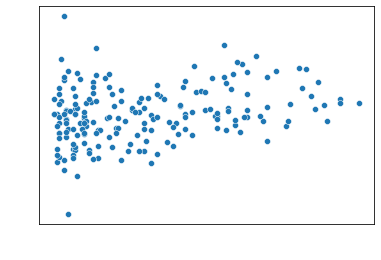

In [356]:
sns.scatterplot(x = "RBI", y = "HIT_ANG_VER", data = HTS_grouped_name)


<AxesSubplot:xlabel='RBI', ylabel='HIT_VEL'>

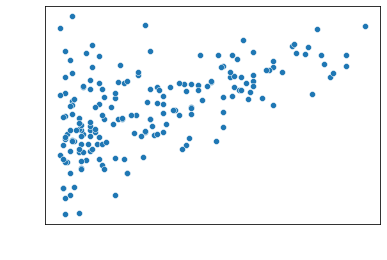

In [357]:
sns.scatterplot(x = "RBI", y = "HIT_VEL", data = HTS_grouped_name)

In [358]:
batter_base.corr()[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
GYEAR,NaN,NaN,NaN
PCODE,0.141051,0.204592,0.187384
GAMENUM,0.513750,0.655764,0.629061
PA,0.482492,0.666547,0.621079
AB,0.476504,0.663722,0.616627
BA,0.850311,0.895262,0.927541
HIT,0.485575,0.675279,0.627722
HR,0.380632,0.658769,0.569420
TOTB,0.470580,0.696961,0.633761
SLG,0.778935,1.000000,0.957201


In [359]:
batter_base.head()

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5,백창수,30,0.313609,0.727609
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0,김창혁,27,0.200000,0.500000
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0,김응민,26,0.000000,0.000000
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3,이해창,31,0.265896,0.654896
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0,백상원,30,0.625000,1.125000


In [360]:
len(set(HTS_grouped_name["NAME"]))

192

In [415]:
# final_batter_base는 batter_base에 타점,득점, 타구속도, 발사각도 추가 



final_batter_base = batter_base.copy()
final_batter_base = final_batter_base[final_batter_base["AB"] > 30]
final_batter_base["R"] = pd.Series()
final_batter_base["RBI"] = pd.Series()
final_batter_base["HIT_VEL"] = pd.Series()
final_batter_base["HIT_ANG_VER"] = pd.Series()

final_batter_base



<ipython-input-415-78fc6683b67f>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["R"] = pd.Series()
<ipython-input-415-78fc6683b67f>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["RBI"] = pd.Series()
<ipython-input-415-78fc6683b67f>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL"] = pd.Series()
<ipython-input-415-78fc6683b67f>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG_VER"] = pd.Series()


,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,...,HP,GD,NAME,AGE_VA,OBP,OPS,R,RBI,HIT_VEL,HIT_ANG_VER
0,2018,60100,70,169,152,0.243,37,3,63,0.414,...,4,5,백창수,30,0.313609,0.727609,NaN,NaN,NaN,NaN
3,2018,60343,83,174,162,0.216,35,8,63,0.389,...,3,3,이해창,31,0.265896,0.654896,NaN,NaN,NaN,NaN
5,2018,60523,91,194,174,0.305,53,7,86,0.494,...,1,4,정훈,30,0.360825,0.854825,NaN,NaN,NaN,NaN
6,2018,60558,128,374,342,0.254,87,12,144,0.421,...,4,7,오태곤,26,0.309973,0.730973,NaN,NaN,NaN,NaN
7,2018,60566,114,204,187,0.251,47,0,49,0.262,...,2,8,이상호,29,0.289340,0.551340,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2018,79465,69,168,147,0.245,36,0,42,0.286,...,3,2,배영섭,32,0.331325,0.617325,NaN,NaN,NaN,NaN
271,2018,79608,130,549,494,0.342,169,23,278,0.563,...,10,13,안치홍,28,0.391621,0.954621,NaN,NaN,NaN,NaN
272,2018,79705,58,102,85,0.259,22,4,39,0.459,...,3,3,김회성,32,0.363636,0.822636,NaN,NaN,NaN,NaN
273,2018,99606,88,205,183,0.295,54,4,77,0.421,...,5,5,정성훈,38,0.365854,0.786854,NaN,NaN,NaN,NaN


In [416]:
HTS_grouped_PCODE_PCODE = list(HTS_grouped_PCODE["PCODE"])
HTS_grouped_PCODE_NAME = list(HTS_grouped_PCODE["NAME"])
HTS_grouped_PCODE_HIT_VEL = list(HTS_grouped_PCODE["HIT_VEL"])
HTS_grouped_PCODE_HIT_ANG_VER = list(HTS_grouped_PCODE["HIT_ANG_VER"])
HTS_grouped_PCODE_R = list(HTS_grouped_PCODE["R"])
HTS_grouped_PCODE_RBI = list(HTS_grouped_PCODE["RBI"])

In [417]:
HTS_PCODE_HIT_VEL = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_VEL)))
HTS_PCODE_HIT_ANG_VER = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_HIT_ANG_VER)))
HTS_PCODE_R = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_R)))
HTS_PCODE_RBI = dict(list(zip(HTS_grouped_PCODE_PCODE, HTS_grouped_PCODE_RBI)))

In [418]:
final_batter_base["R"] = final_batter_base["PCODE"].map(HTS_PCODE_R).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["RBI"] = final_batter_base["PCODE"].map(HTS_PCODE_RBI).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_VEL"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_VEL).apply(lambda x : 0 if pd.isnull(x) else x)
final_batter_base["HIT_ANG_VER"] = final_batter_base["PCODE"].map(HTS_PCODE_HIT_ANG_VER).apply(lambda x : 0 if pd.isnull(x) else x)

final_batter_base = HTS_grouped_PCODE.merge(final_batter_base, on =["PCODE","HIT_VEL","HIT_ANG_VER","R","RBI","NAME"])

In [419]:
final_batter_base


,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,0.414,1,12,36,0,4,5,30,0.313609,0.727609
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,0.389,0,8,49,0,3,3,31,0.265896,0.654896
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,0.494,3,16,39,1,1,4,30,0.360825,0.854825
3,60558,135.625,11.4,55.0,39.0,오태곤,2018,128,374,342,...,0.421,1,24,92,0,4,7,26,0.309973,0.730973
4,60566,117.000,6.2,32.0,8.0,이상호,2018,114,204,187,...,0.262,0,8,15,0,2,8,29,0.289340,0.551340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,79465,134.515,6.9,15.0,13.0,배영섭,2018,69,168,147,...,0.286,0,16,35,2,3,2,32,0.331325,0.617325
184,79608,138.555,15.7,88.0,118.0,안치홍,2018,130,549,494,...,0.563,9,36,57,1,10,13,28,0.391621,0.954621
185,79705,138.880,18.2,15.0,17.0,김회성,2018,58,102,85,...,0.459,0,11,26,0,3,3,32,0.363636,0.822636
186,99606,142.020,9.1,22.0,28.0,정성훈,2018,88,205,183,...,0.421,1,16,49,1,5,5,38,0.365854,0.786854


In [761]:
final_batter_base[["BA", "SLG","R","RBI"]].corr()

,BA,SLG,R,RBI
BA,1.000000,0.812216,0.609336,0.599000
SLG,0.812216,1.000000,0.653284,0.760976
R,0.609336,0.653284,1.000000,0.889658
RBI,0.599000,0.760976,0.889658,1.000000


In [420]:
final_batter_base[(final_batter_base["OBP"] == 0) | (final_batter_base["OPS"] == 0)]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [421]:
final_batter_base[final_batter_base["AB"] < 30]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS


In [422]:
final_batter_base.to_csv("./final18.csv", index =False)ㅈ

In [423]:
pd.read_csv("final18.csv")

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,SLG,SF,BB,KK,IB,HP,GD,AGE_VA,OBP,OPS
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,0.414,1,12,36,0,4,5,30,0.313609,0.727609
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,0.389,0,8,49,0,3,3,31,0.265896,0.654896
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,0.494,3,16,39,1,1,4,30,0.360825,0.854825
3,60558,135.625,11.4,55.0,39.0,오태곤,2018,128,374,342,...,0.421,1,24,92,0,4,7,26,0.309973,0.730973
4,60566,117.000,6.2,32.0,8.0,이상호,2018,114,204,187,...,0.262,0,8,15,0,2,8,29,0.289340,0.551340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,79465,134.515,6.9,15.0,13.0,배영섭,2018,69,168,147,...,0.286,0,16,35,2,3,2,32,0.331325,0.617325
184,79608,138.555,15.7,88.0,118.0,안치홍,2018,130,549,494,...,0.563,9,36,57,1,10,13,28,0.391621,0.954621
185,79705,138.880,18.2,15.0,17.0,김회성,2018,58,102,85,...,0.459,0,11,26,0,3,3,32,0.363636,0.822636
186,99606,142.020,9.1,22.0,28.0,정성훈,2018,88,205,183,...,0.421,1,16,49,1,5,5,38,0.365854,0.786854


In [641]:
#HTS_123H = HTS[(HTS["HIT_RESULT"] == "1루타") | (HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]
#HTS_23H = HTS[(HTS["HIT_RESULT"] == "2루타") |(HTS["HIT_RESULT"] == "3루타") | (HTS["HIT_RESULT"] == "홈런")]




final_batter_base["HIT_ANG25"] = pd.Series()
final_batter_base["HIT_ANG75"] = pd.Series()
final_batter_base["HIT_ANG50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_ANG25 = []
HIT_ANG75 = []
HIT_ANG50 = []

for i in final_batter_base_name :
    HIT_ANG25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_ANG_VER"])
    HIT_ANG75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_ANG_VER"])
    HIT_ANG50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_ANG_VER"])

    
NAME_HIT_ANG25 = dict(list(zip(final_batter_base_name, HIT_ANG25)))
NAME_HIT_ANG75 = dict(list(zip(final_batter_base_name, HIT_ANG75)))
NAME_HIT_ANG50 = dict(list(zip(final_batter_base_name, HIT_ANG50)))

final_batter_base["HIT_ANG25"] = final_batter_base["NAME"].map(NAME_HIT_ANG25)
final_batter_base["HIT_ANG75"] = final_batter_base["NAME"].map(NAME_HIT_ANG75)
final_batter_base["HIT_ANG50"] = final_batter_base["NAME"].map(NAME_HIT_ANG50)

final_batter_base["Barrel"] = pd.Series()

for i in range(final_batter_base.shape[0]):
    final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]

<ipython-input-641-6267ac9dbfb8>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG25"] = pd.Series()
<ipython-input-641-6267ac9dbfb8>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG75"] = pd.Series()
<ipython-input-641-6267ac9dbfb8>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_ANG50"] = pd.Series()
<ipython-input-641-6267ac9dbfb8>:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["Barrel"] = pd.Series()
<ipyth

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_batter_base["Barrel"][i] = Barrel_Hit(HTS,final_batter_base["HIT_VEL"][i] ,final_batter_base["HIT_ANG25"][i], final_batter_base["HIT_ANG75"][i])["Barrel"]
<ipython-input-641-6267ac9dbfb8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [638]:
final_batter_base["HIT_VEL25"] = pd.Series()
final_batter_base["HIT_VEL75"] = pd.Series()
final_batter_base["HIT_VEL50"] = pd.Series()

final_batter_base_name = list(final_batter_base["NAME"])
HIT_VEL25 = []
HIT_VEL75 = []
HIT_VEL50 = []

for i in final_batter_base_name :
    HIT_VEL25.append((HTS[HTS["NAME"] == i]).describe().loc["25%","HIT_VEL"])
    HIT_VEL75.append((HTS[HTS["NAME"] == i]).describe().loc["75%","HIT_VEL"])
    HIT_VEL50.append((HTS[HTS["NAME"] == i]).describe().loc["50%","HIT_VEL"])

    
NAME_HIT_VEL25 = dict(list(zip(final_batter_base_name, HIT_VEL25)))
NAME_HIT_VEL75 = dict(list(zip(final_batter_base_name, HIT_VEL75)))
NAME_HIT_VEL50 = dict(list(zip(final_batter_base_name, HIT_VEL50)))

final_batter_base["HIT_VEL25"] = final_batter_base["NAME"].map(NAME_HIT_VEL25)
final_batter_base["HIT_VEL75"] = final_batter_base["NAME"].map(NAME_HIT_VEL75)
final_batter_base["HIT_VEL50"] = final_batter_base["NAME"].map(NAME_HIT_VEL50)

<ipython-input-638-aa522e9287dc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL25"] = pd.Series()
<ipython-input-638-aa522e9287dc>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL75"] = pd.Series()
<ipython-input-638-aa522e9287dc>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  final_batter_base["HIT_VEL50"] = pd.Series()


In [639]:
final_batter_base.head()

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,AGE_VA,OBP,OPS,Barrel,HIT_ANG25,HIT_ANG75,HIT_ANG50,HIT_VEL25,HIT_VEL75,HIT_VEL50
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,30,0.313609,0.727609,1.156583,7.800,43.900,22.8,120.8400,148.830,138.380
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,31,0.265896,0.654896,1.072885,1.750,40.650,18.7,116.9900,149.835,137.370
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,30,0.360825,0.854825,1.180111,-1.000,31.025,15.1,132.4125,150.570,141.155
3,60558,135.625,11.4,55.0,39.0,오태곤,2018,128,374,342,...,26,0.309973,0.730973,0.885692,-4.575,27.650,11.4,114.6475,147.250,135.625
4,60566,117.000,6.2,32.0,8.0,이상호,2018,114,204,187,...,29,0.289340,0.551340,0.550175,-11.200,20.900,6.2,95.0900,136.390,117.000


In [612]:
final_batter_base[final_batter_base["Barrel"] >= 1 ]

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,KK,IB,HP,GD,AGE_VA,OBP,OPS,Barrel,HIT_ANG25,HIT_ANG75
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,36,0,4,5,30,0.313609,0.727609,1.156583,7.800,43.900
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,49,0,3,3,31,0.265896,0.654896,1.072885,1.750,40.650
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,39,1,1,4,30,0.360825,0.854825,1.180111,-1.000,31.025
6,61102,139.570,15.8,53.0,66.0,유강남,2018,132,465,425,...,80,1,9,21,25,0.352052,0.860052,1.086627,-2.300,37.600
10,61204,140.400,14.5,11.0,9.0,김동한,2018,55,96,83,...,18,0,0,1,30,0.265957,0.542957,1.017823,-2.325,26.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,79215,141.490,12.3,79.0,84.0,박건우,2018,125,529,488,...,65,1,10,14,27,0.373106,0.846106,1.093984,-2.150,28.200
177,79240,138.900,12.5,85.0,79.0,허경민,2018,133,577,516,...,52,0,16,15,27,0.375874,0.834874,1.016753,-2.800,28.300
180,79365,140.740,18.1,19.0,17.0,박동원,2018,39,128,117,...,25,1,0,3,28,0.301587,0.728587,1.009944,-4.500,42.400
184,79608,138.555,15.7,88.0,118.0,안치홍,2018,130,549,494,...,57,1,10,13,28,0.391621,0.954621,1.073289,-2.650,32.200


In [582]:
Barrel_Hit(HTS, 145, 18, 30)

{'장타율': 2.232142857142857,
 '타율': 0.719047619047619,
 'Barrel': 2.1400226757369616}

In [586]:
HTS["PIT_VEL"].describe()

count    35029.000000
mean       135.710365
std          9.445294
min         88.290000
25%        129.670000
50%        137.290000
75%        143.220000
max        159.400000
Name: PIT_VEL, dtype: float64

C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\qkfkd\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PIT_VEL', ylabel='Density'>

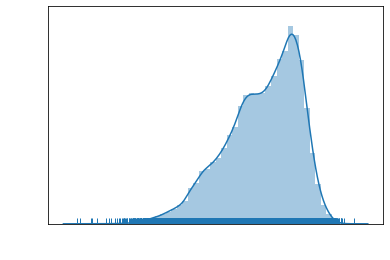

In [592]:
sns.distplot(HTS["PIT_VEL"], rug = True)

(array([5.000e+00, 2.200e+01, 2.630e+02, 9.940e+02, 3.155e+03, 5.683e+03,
        8.379e+03, 1.113e+04, 5.226e+03, 1.720e+02]),
 array([ 88.29 ,  95.401, 102.512, 109.623, 116.734, 123.845, 130.956,
        138.067, 145.178, 152.289, 159.4  ]),
 <BarContainer object of 10 artists>)

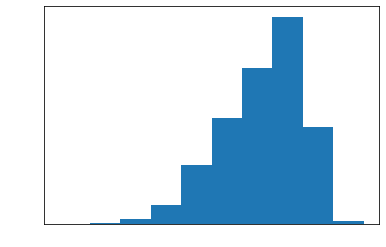

In [593]:
plt.hist(HTS["PIT_VEL"])

(array([1482., 1524., 1747., 1764., 1684., 1565., 1300.,  967.,  710.,
         460.,  300.,  181.,  125.]),
 array([140.01      , 141.00846154, 142.00692308, 143.00538462,
        144.00384615, 145.00230769, 146.00076923, 146.99923077,
        147.99769231, 148.99615385, 149.99461538, 150.99307692,
        151.99153846, 152.99      ]),
 <BarContainer object of 13 artists>)

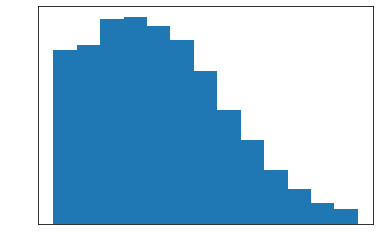

In [606]:
plt.hist((HTS[(HTS["PIT_VEL"] > 140) & (HTS["PIT_VEL"] < 153) ])["PIT_VEL"], bins = 13)

In [607]:
(HTS[(HTS["PIT_VEL"] >= 149) & (HTS["PIT_VEL"] < 153) ])["HIT_RESULT"].value_counts()

플라이          295
1루타          258
땅볼아웃         251
2루타           76
파울플라이         41
홈런            41
직선타           34
내야안타(1루타)     22
병살타           19
희생플라이         15
3루타            7
인필드플라이         5
야수선택           1
희생번트           1
Name: HIT_RESULT, dtype: int64

In [608]:
(HTS[(HTS["PIT_VEL"] >= 140) & (HTS["PIT_VEL"] < 149) ])["HIT_RESULT"].value_counts()

플라이          3736
1루타          3077
땅볼아웃         2587
2루타           906
홈런            643
파울플라이         485
직선타           418
병살타           320
내야안타(1루타)     186
희생플라이         156
희생번트           99
3루타            70
인필드플라이         29
번트아웃           23
번트안타           14
야수선택            8
Name: HIT_RESULT, dtype: int64

In [640]:
final_batter_base.corr()[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
PCODE,0.222789,0.185339,0.208401
HIT_VEL,0.408184,0.644725,0.598252
HIT_ANG_VER,0.055750,0.321548,0.247313
R,0.561599,0.653284,0.657311
RBI,0.549414,0.760976,0.729483
GYEAR,NaN,NaN,NaN
GAMENUM,0.395702,0.458971,0.462196
PA,0.501770,0.615673,0.609971
AB,0.484105,0.610002,0.599848
BA,0.913139,0.812216,0.891452


In [774]:
Barrel_Hit(HTS, 150, -10, 32)

{'장타율': 1.2753908816187098, '타율': 0.6728419392983839}

In [683]:
final_batter_base.describe()[["HIT_VEL25", "HIT_VEL50", "HIT_VEL75","HIT_ANG25","HIT_ANG50","HIT_ANG75","HIT_ANG_VER"]]

,HIT_VEL25,HIT_VEL50,HIT_VEL75,HIT_ANG25,HIT_ANG50,HIT_ANG75,HIT_ANG_VER
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,117.210213,135.559787,148.506822,-2.834309,13.077926,30.704388,13.080053
std,7.827236,6.725337,5.601409,4.149691,5.257775,6.649575,5.262186
min,91.185000,116.200000,132.350000,-14.700000,-3.400000,11.550000,-3.400000
25%,112.610000,131.105000,144.448750,-5.106250,9.775000,26.393750,9.775000
50%,117.713750,136.145000,148.737500,-3.037500,13.000000,30.450000,13.000000
75%,121.959375,140.626250,152.896250,-0.687500,16.100000,35.231250,16.100000
max,139.940000,151.440000,160.890000,12.775000,39.150000,60.200000,39.150000


In [674]:
final_batter_base.head()

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,AGE_VA,OBP,OPS,Barrel,HIT_ANG25,HIT_ANG75,HIT_ANG50,HIT_VEL25,HIT_VEL75,HIT_VEL50
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,30,0.313609,0.727609,1.156583,7.800,43.900,22.8,120.8400,148.830,138.380
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,31,0.265896,0.654896,1.072885,1.750,40.650,18.7,116.9900,149.835,137.370
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,30,0.360825,0.854825,1.180111,-1.000,31.025,15.1,132.4125,150.570,141.155
3,60558,135.625,11.4,55.0,39.0,오태곤,2018,128,374,342,...,26,0.309973,0.730973,0.885692,-4.575,27.650,11.4,114.6475,147.250,135.625
4,60566,117.000,6.2,32.0,8.0,이상호,2018,114,204,187,...,29,0.289340,0.551340,0.550175,-11.200,20.900,6.2,95.0900,136.390,117.000


In [679]:
HTS

,GYEAR,G_ID,PIT_ID,PCODE,T_ID,INN,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PIT_VEL,STADIUM,NAME,AGE_VA
0,2018,20180324HHWO0,180324_140436,62797,한화,1,131.50,42.7,플라이,149.59,고척,양성우,29
1,2018,20180324HHWO0,180324_140514,76753,한화,1,135.18,9.9,1루타,148.78,고척,송광민,35
2,2018,20180324HHWO0,180324_140647,71752,한화,1,152.41,2.1,1루타,148.59,고척,김태균,36
3,2018,20180324HHWO0,180324_140911,62700,한화,1,113.72,13.5,1루타,139.13,고척,하주석,24
4,2018,20180324HHWO0,180324_142050,68730,한화,2,54.11,16.4,번트안타,134.07,고척,호잉,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,2018,20181014OBLT0,181014_161746,75334,두산,9,161.12,-7.4,1루타,145.81,사직,오재일,31
35025,2018,20181014OBLT0,181014_162521,68205,두산,9,131.71,26.4,플라이,146.38,사직,전민재,19
35026,2018,20181014OBLT0,181014_162755,76509,롯데,9,119.64,28.8,플라이,141.23,사직,김문호,31
35027,2018,20181014OBLT0,181014_162938,60523,롯데,9,164.98,15.7,직선타,125.59,사직,정훈,30


In [712]:
Barrel_count = \
HTS[
    (HTS["HIT_ANG_VER"] >= 11.2) & \
    (HTS["HIT_ANG_VER"] <= 32.00) & \
    (HTS["HIT_VEL"] >= 142.45)
    
].groupby(["PCODE",])["HIT_RESULT"].count().reset_index().sort_values(by = "HIT_RESULT", ascending = False)

print(Barrel_count)


     PCODE  HIT_RESULT
164  76267          91
184  78224          89
128  71564          88
133  72443          81
199  79192          78
..     ...         ...
97   66968           1
26   62353           1
167  76368           1
82   66207           1
71   64906           1

[216 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [716]:
batter_base_Batter_percent = batter_base.copy()
batter_base_Batter_percent = batter_base_Batter_percent[["PCODE", "AB"]]
batter_base_Batter_percent = batter_base_Batter_percent.merge(Barrel_count)
batter_base_Batter_percent["Batter %"] = (batter_base_Batter_percent["HIT_RESULT"]) / (batter_base_Batter_percent["AB"])
display(batter_base_Batter_percent)

,PCODE,AB,HIT_RESULT,Batter %
0,60100,152,19,0.125000
1,60343,162,13,0.080247
2,60523,174,25,0.143678
3,60558,342,33,0.096491
4,60566,187,3,0.016043
...,...,...,...,...
211,79530,14,2,0.142857
212,79608,494,74,0.149798
213,79705,85,9,0.105882
214,99606,183,18,0.098361


In [736]:
final_batter_base.merge(batter_base_Batter_percent[["PCODE", "Batter %"]])

,PCODE,HIT_VEL,HIT_ANG_VER,R,RBI,NAME,GYEAR,GAMENUM,PA,AB,...,OBP,OPS,Barrel,HIT_ANG25,HIT_ANG75,HIT_ANG50,HIT_VEL25,HIT_VEL75,HIT_VEL50,Batter %
0,60100,138.380,22.8,21.0,18.0,백창수,2018,70,169,152,...,0.313609,0.727609,1.156583,7.800,43.900,22.8,120.8400,148.8300,138.380,0.125000
1,60343,137.370,18.7,19.0,24.0,이해창,2018,83,174,162,...,0.265896,0.654896,1.072885,1.750,40.650,18.7,116.9900,149.8350,137.370,0.080247
2,60523,141.155,15.1,33.0,26.0,정훈,2018,91,194,174,...,0.360825,0.854825,1.180111,-1.000,31.025,15.1,132.4125,150.5700,141.155,0.143678
3,60558,135.625,11.4,55.0,39.0,오태곤,2018,128,374,342,...,0.309973,0.730973,0.885692,-4.575,27.650,11.4,114.6475,147.2500,135.625,0.096491
4,60566,117.000,6.2,32.0,8.0,이상호,2018,114,204,187,...,0.289340,0.551340,0.550175,-11.200,20.900,6.2,95.0900,136.3900,117.000,0.016043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,79465,134.515,6.9,15.0,13.0,배영섭,2018,69,168,147,...,0.331325,0.617325,0.841152,-4.425,26.250,6.9,115.4250,143.1950,134.515,0.034014
180,79608,138.555,15.7,88.0,118.0,안치홍,2018,130,549,494,...,0.391621,0.954621,1.073289,-2.650,32.200,15.7,120.4500,152.7875,138.555,0.149798
181,79705,138.880,18.2,15.0,17.0,김회성,2018,58,102,85,...,0.363636,0.822636,1.162415,1.200,37.225,18.2,118.2650,148.8775,138.880,0.105882
182,99606,142.020,9.1,22.0,28.0,정성훈,2018,88,205,183,...,0.365854,0.786854,0.982698,-2.550,24.750,9.1,116.5400,152.9100,142.020,0.098361


In [769]:
Barrel_Hit(HTS,141,0,32)

{'장타율': 1.3346273291925466, '타율': 0.6898846495119787}

In [729]:
final_batter_base.merge(batter_base_Batter_percent[["PCODE", "Batter %"]]).corr()[["OPS","OBP","SLG"]]

,OPS,OBP,SLG
PCODE,0.218359,0.233727,0.193583
HIT_VEL,0.595770,0.412070,0.639368
HIT_ANG_VER,0.217149,0.030241,0.292156
R,0.656899,0.566079,0.649907
RBI,0.731108,0.553234,0.761173
GYEAR,NaN,NaN,NaN
GAMENUM,0.452762,0.398354,0.443907
PA,0.606411,0.505283,0.608478
AB,0.595787,0.486944,0.602492
BA,0.887693,0.911629,0.805965


In [701]:
batter_base[batter_base["PCODE"] == 78224]

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD,NAME,AGE_VA,OBP,OPS
237,2018,78224,139,602,527,0.334,176,44,346,0.657,7,59,134,4,9,6,김재환,29,0.405316,1.062316


In [704]:
Barrel_Hit(HTS, 142.45, 11.20, 32.00)

{'장타율': 1.6916459567960238,
 '타율': 0.6711909768686676,
 'Barrel': 1.5138900030104736}

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3449505e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b344950ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b344950280>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3449743a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b344974700>],
 'means': []}

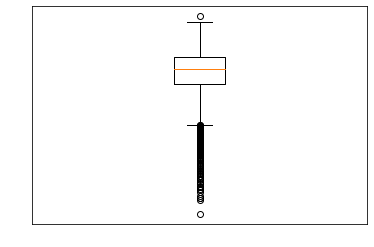

In [628]:
plt.boxplot(HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_VEL"])

In [646]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

25%    142.450
50%    150.730
75%    157.095
Name: HIT_VEL, dtype: float64

In [631]:
HTS[HTS["HIT_RESULT"] == "2루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

count    2519.000000
mean       16.474236
std        10.907409
min       -50.200000
25%        11.200000
50%        16.900000
75%        21.950000
max        63.200000
Name: HIT_ANG_VER, dtype: float64

In [632]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

count    180.000000
mean     147.744889
std       10.672952
min       95.350000
25%      142.612500
50%      148.845000
75%      154.367500
max      170.670000
Name: HIT_VEL, dtype: float64

In [633]:
HTS[HTS["HIT_RESULT"] == "3루타"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

count    180.000000
mean      18.806667
std       10.108300
min      -19.500000
25%       13.250000
50%       18.600000
75%       25.375000
max       52.600000
Name: HIT_ANG_VER, dtype: float64

In [634]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_VEL"].describe().loc[["25%", "50%", "75%"]]

count    1708.000000
mean      156.084543
std         7.551596
min       131.390000
25%       151.072500
50%       156.415000
75%       161.300000
max       178.170000
Name: HIT_VEL, dtype: float64

In [635]:
HTS[HTS["HIT_RESULT"] == "홈런"]["HIT_ANG_VER"].describe().loc[["25%", "50%", "75%"]]

count    1708.000000
mean       28.597248
std         5.729427
min        15.500000
25%        24.400000
50%        28.000000
75%        32.000000
max        50.100000
Name: HIT_ANG_VER, dtype: float64